In [ ]:
pip install nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords


In [ ]:
pip install emoji

     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49714 sha256=29153e912a9ca7e1abd57dbdbac4dc9e3d6a4022a899bbd6ab74207e4d9f825d
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import emoji
import collections
from datetime import datetime
import calendar
from wordcloud import WordCloud, STOPWORDS
import nltk
import collections

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
record_data=[]
def startsWithDate(line):
  pattern='^([0-9]{2})(\/)([0-9]{2})(\/)([0-9]{2})'
  check=re.match(pattern,line)
  if check:
    return True
  else:
    return False
def checkAuthor(data):
  data=data.split(':')
  if(len(data)>1):
    return True 
  else:
    return False


file =open('WhatsApp Chat with Peace Elite 2.0.txt',encoding="utf-8")
file.readline()
message=[]
while True:
  line=file.readline()
  date=None
  time=None
  author=None
  if not line:
    break
  line=line.strip()
  if (startsWithDate(line)):
    date=line.split(',')[0]
    data=" ".join(line.split(',')[1:]).strip()
    time=data.split('-')[0].strip()
    data=" ".join(data.split('-')[1:]).strip()

    if checkAuthor(data):
      message=[]
      author=data.split(':')[0].strip()
      message.append("".join(data.split(':')[1:]).strip())
      record_data.append([date,time,author,message])
    else:
      message=[]
      message.append(data)
      record_data.append([date,time,author,message])
  else:
    message.append(line)


In [ ]:
data=pd.DataFrame(record_data,columns=['Date','Time','Author','Message'])
data['Message']=data['Message'].apply(lambda x: " ".join(x))
data.dropna()
data=data[data['Message']!='Missed video call']
data=data[data['Message']!='Missed voice call']


data.head()


,Date,Time,Author,Message
0,07/04/2020,23:38,Surya,3
1,07/04/2020,23:38,Venkatesh Cse,Answer will be goli soda ..I am unable to fram...
2,07/04/2020,23:38,Ramana Le,🤣
3,07/04/2020,23:38,Surya,<Media omitted>
4,07/04/2020,23:38,Winayak,🤣🤣


In [ ]:
def emoji_check(data):
   emoji_list=[]
   for word in data:
      if any (char in emoji.UNICODE_EMOJI for char in word): 
        emoji_list.append(word)
        return emoji_list
total_messages=data.shape[0]
total_media=data[data['Message'].apply(lambda x: '<Media omitted>' in x)].shape[0]
#data['Emoji']=data['Message'].apply(emoji_check)
#total_emoji=sum(data['Emoji'].str.len())

print("Group Wise Stats")
print("Total Messages",total_messages)
print("Total Media",total_media)
#print("Total Emoji",total_emoji)


Group Wise Stats
Total Messages 39998
Total Media 1963


In [ ]:
data['Letters']=data['Message'].apply(lambda x: len(x))
data['Words']=data['Message'].apply(lambda x: len(x.split(" ")))
data.head(10)


,Date,Time,Author,Message,Letters,Words
0,07/04/2020,23:38,Surya,3,1,1
1,07/04/2020,23:38,Venkatesh Cse,Answer will be goli soda ..I am unable to fram...,56,11
2,07/04/2020,23:38,Ramana Le,🤣,1,1
3,07/04/2020,23:38,Surya,<Media omitted>,15,2
4,07/04/2020,23:38,Winayak,🤣🤣,2,1
5,07/04/2020,23:39,GOPI,Forgot answer,13,2
6,07/04/2020,23:39,GOPI,379,3,1
7,07/04/2020,23:39,Surya,Solve now,9,2
8,07/04/2020,23:39,GOPI,369,3,1
9,07/04/2020,23:39,Surya,No,2,1


Users Message Count


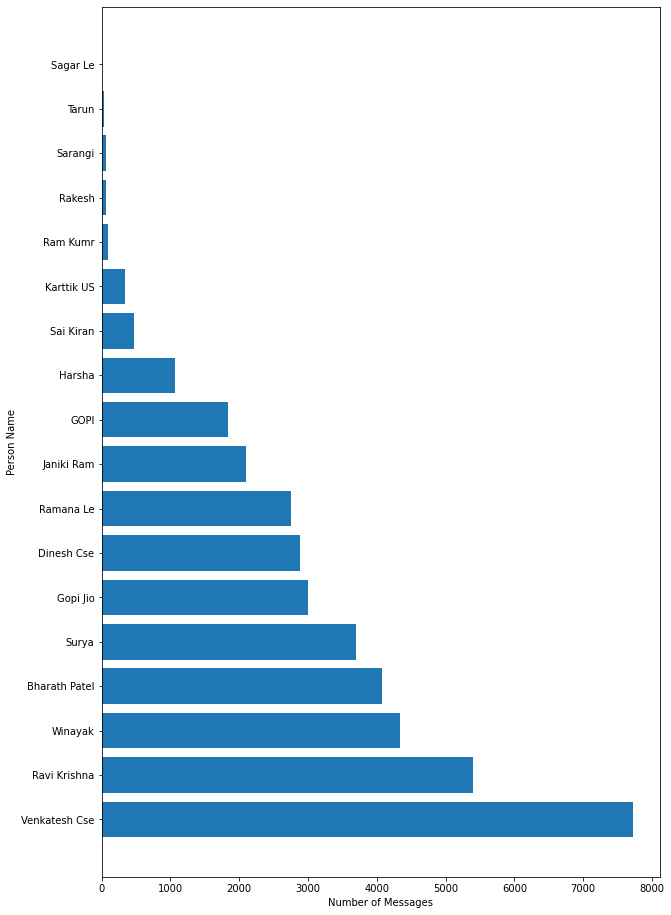

In [ ]:
authors_data=data.groupby('Author').count()['Message'].sort_values(ascending=False)
plt.figure(figsize=(10,16))
plt.barh(authors_data.index,list(authors_data))
plt.xlabel('Number of Messages')
plt.ylabel('Person Name')
plt.show()


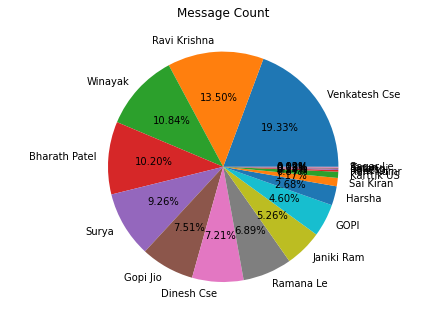

In [ ]:
authors_data=data.groupby('Author').count()['Message'].sort_values(ascending=False)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(list(authors_data), labels = authors_data.index.array,autopct='%1.2f%%')
plt.title("Message Count")
plt.show()

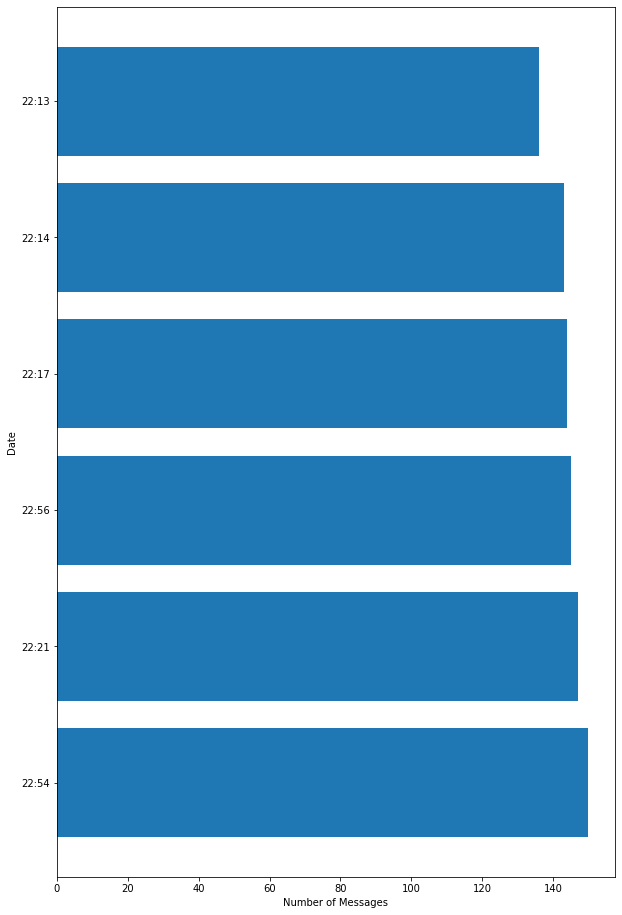

In [ ]:
time_data=data.groupby('Time').count()['Message'].sort_values(ascending=False)
time_data.head(5)
plt.figure(figsize=(10,16))
plt.barh(time_data.index[0:6],list(time_data)[0:6])
plt.xlabel('Number of Messages')
plt.ylabel('Date')
plt.show()

In [ ]:
author=list(data['Author'].unique())
#Ignoring None values
authors_names = []
authors_msg_count =[]
from nltk.corpus import stopwords
author=[aut for aut in author if aut is not None]
#Gathering Stats
regex = re.compile('[@_!#$%^&*()<>?/\|}{~:]') 
for index in range(len(author)):
  listofWords=[]
  new_data=data[data['Author']==author[index]]
  print("\n   Stats related to "+author[index]+" -\n") 
  num_messages=new_data.shape[0]
  print("Total Number of messages ",num_messages)
  avg_words_per_message=np.round(np.average(new_data['Words']),2)
  print("Average words per message ",avg_words_per_message)
  #emoji_count=sum(new_data['Emoji'].str.len()) 
  #print("Emoji Count ",emoji_count)
  media_count=new_data[new_data['Message'].apply(lambda x: '<Media omitted>' in x)].shape
  print("Media Count ",media_count[0])
  new_data['tokenized_sents'] = new_data.apply(lambda row: nltk.word_tokenize(row['Message']), axis=1)   
  for word in new_data.tokenized_sents.to_list():    
    if  (regex.search(str(word)) == None):
      if (bool(re.match('^[0-9]+$', str(word))) is False):
        listofWords=listofWords+word
  authors_names = authors_names +[author[index]] 
  authors_msg_count = authors_msg_count + [len(listofWords)]
  stop = stopwords.words('english')
  stop= stop +['ki','ra','emo','ee','This','ea','No','Ani','You','u','..','aah','message','ne','deleted','ga','ka','1','2','\'s','3','1987','inka','ah','na','tho','lo','was','a','e','.','...','Ha','kuda','em','ni','aa','ae','Aa','ani','anta','I','S','A','Haa']
  processedWords = [word for word in listofWords if word not in stop]
  counter = collections.Counter(processedWords)
  print("top 3 most used words", counter.most_common(3))
  print(" ")

print(authors_names)
print(authors_msg_count)
 


   Stats related to Surya -

Total Number of messages  3702
Average words per message  3.93
Media Count  39


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


top 3 most used words [('🤣', 116), ('Rey', 115), ('Ok', 97)]
 

   Stats related to Venkatesh Cse -

Total Number of messages  7725
Average words per message  3.82
Media Count  370
top 3 most used words [('Cool', 251), ('Yes', 242), ("n't", 135)]
 

   Stats related to Ramana Le -

Total Number of messages  2754
Average words per message  3.86
Media Count  94
top 3 most used words [('🤣', 54), ('Ok', 36), ('😁', 31)]
 

   Stats related to Winayak -

Total Number of messages  4332
Average words per message  4.05
Media Count  155
top 3 most used words [('🤣🤣', 93), ('😂😂', 81), ('kadha', 67)]
 

   Stats related to GOPI -

Total Number of messages  1840
Average words per message  2.86
Media Count  68
top 3 most used words [('🤣', 82), ('Hoo', 43), ('🤣🤣', 37)]
 

   Stats related to Janiki Ram -

Total Number of messages  2103
Average words per message  3.8
Media Count  82
top 3 most used words [('Lol', 44), ('anni', 36), ('Good', 35)]
 

   Stats related to Sai Kiran -

Total Number of messa

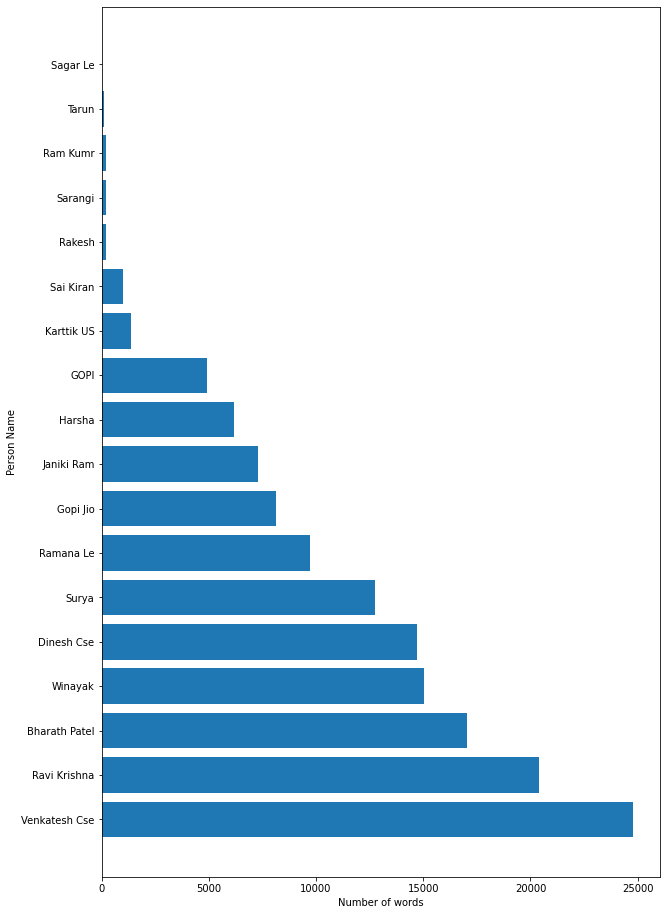

In [ ]:
dictionary = dict(zip(authors_names, authors_msg_count))
sort_orders = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)
pNames=[]
pcount=[]
for i in sort_orders:
  pNames.append(i[0])
  pcount.append(i[1])
plt.figure(figsize=(10,16))
plt.barh(pNames,pcount)
plt.barh
plt.xlabel('Number of words')
plt.ylabel('Person Name')
plt.show()

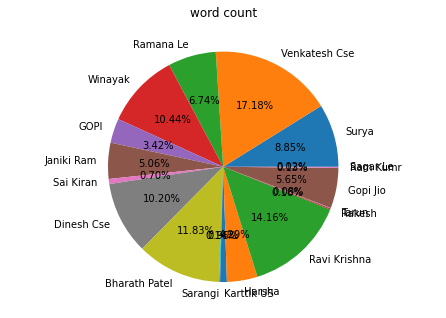

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(authors_msg_count, labels = authors_names,autopct='%1.2f%%')
plt.title("word count")
plt.show()

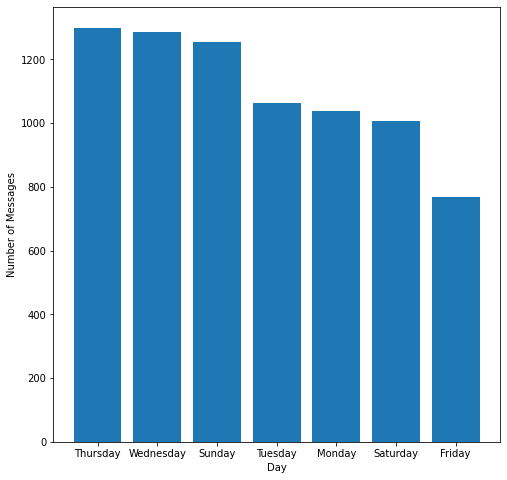

In [ ]:
def day_check(text):
  day=datetime.strptime(text, '%d/%m/%Y').weekday()
  return calendar.day_name[day]

data['Day']=data['Date'].apply(day_check)
day_count=data.groupby('Day').count()['Message'].sort_values(ascending=False)
plt.figure(figsize=(8,8))
plt.bar(day_count.index,day_count) 
plt.xlabel('Day')
plt.ylabel('Number of Messages')
plt.show()


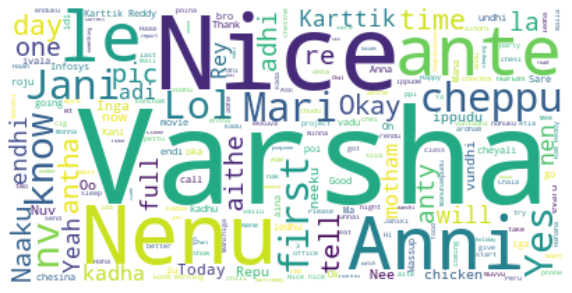

In [ ]:
new_data=data[data['Message'].apply(lambda x: '<Media omitted>' not in x)]
total_message=" ".join(list(new_data['Message']))
stopwords = set(STOPWORDS)
stopwords.update(['ki','ra','emo','ee','No','Ani','You','u','..','ga','ka','message','1','2','3','1987','inka','ah','na','tho','lo','deleted','was','a','.','...','Ha','kuda','aa','ae','Aa','ani','anta','I','S','A','Haa','Ye','ni','em'])
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(total_message)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

